In [2]:
#Basic of Pandas and Matplotlib
import pandas as pd 
df = pd.read_csv("C:\\Users\\19195\\Desktop\\DataAnalytics\\toy_dataset.csv")   #read the CSV file
df

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [2]:
df.shape   #give the rows and column
df.size  #finds the product of Row and column
df.info()  #gives the detail info above table
df.head()  #gives top five of data 
df.head(10)  #gives top 10 data 
df.tail() #last 5 data 
df.tail(10)  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


,Number,City,Gender,Age,Income,Illness
149990,149991,Austin,Female,26,82163.0,No
149991,149992,Austin,Male,51,97510.0,No
149992,149993,Austin,Male,37,88408.0,No
149993,149994,Austin,Male,64,89906.0,No
149994,149995,Austin,Female,37,106097.0,No
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No
149999,150000,Austin,Female,37,87251.0,No


In [6]:
df1 = pd.DataFrame(df)
df1
df
df.value_counts(['Gender' ])

Gender
Male      83800
Female    66200
dtype: int64

In [4]:
print(df1.loc[2]) #gives the 3rd element from the dataframe

Number           3
City        Dallas
Gender        Male
Age             42
Income     52483.0
Illness         No
Name: 2, dtype: object


In [11]:
#Can do on both ways to get the element of column 'City'
df['City']
df1 = df[df.Gender =='Male']
df1.value_counts('Gender')
# df[['City', 'Gender']]   #for series of Particular column

Gender
Male    83800
dtype: int64

In [6]:
df.loc[:3]   
type(df.City)

pandas.core.series.Series

In [7]:
df.Gender.value_counts()    #count total male and female
df.City.value_counts(ascending = True)  #Counts the total number of City in ascendng order

San Diego           4881
Washington D.C.     8120
Boston              8301
Austin             12292
Mountain View      14219
Dallas             19707
Los Angeles        32173
New York City      50307
Name: City, dtype: int64

In [8]:
df.sort_values(by = ['City', 'Gender'], ascending = False).head()  #sort the Gender and City column by descending order

,Number,City,Gender,Age,Income,Illness
124707,124708,Washington D.C.,Male,38,62295.0,No
124708,124709,Washington D.C.,Male,46,73817.0,No
124709,124710,Washington D.C.,Male,54,84520.0,No
124713,124714,Washington D.C.,Male,28,70574.0,No
124714,124715,Washington D.C.,Male,35,67363.0,No


In [61]:
#Boolean indexing 
# df[df.Gender == 'Male']  #display male only
# df[(df.Gender == 'Male') & (df.Age == 54)]  #display male with age exactly 54
df[(df.City == 'New York City')& (df.Gender == 'Male') & (df.Age >= 65)].head() #display male in New York with greater than 65



,Number,City,Gender,Age,Income,Illness
19989,19990,New York City,Male,65,105947.0,Yes
20065,20066,New York City,Male,65,84342.0,No
20314,20315,New York City,Male,65,88086.0,No
20614,20615,New York City,Male,65,99225.0,No
20629,20630,New York City,Male,65,104050.0,No


In [10]:
df2 = df[(df.Age >= 65) & (df.Income >= 95000) & (df.Illness == 'No')]
df2.value_counts('Gender')  #counts healthy male and female of age >= 65 having income > 95000  


Gender
Male      529
Female    242
dtype: int64

AttributeError: 'Text' object has no property 'projection'

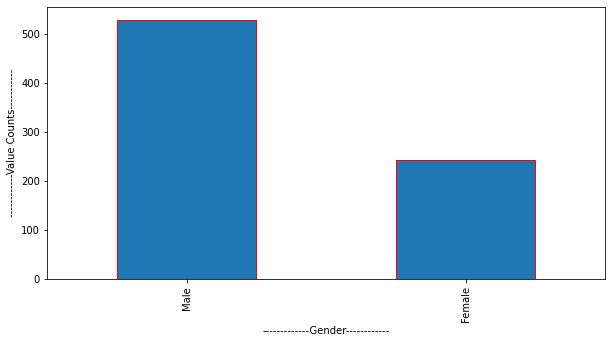

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("C:\\Users\\19195\\Desktop\\DataAnalytics\\toy_dataset.csv")
df2 = df[(df.Age >= 65) & (df.Income >= 95000) & (df.Illness == 'No')]
df2.value_counts('Gender').plot(kind = 'bar', figsize = (10,5), edgecolor = 'Red')
plt.xlabel('-------------Gender------------')
plt.ylabel('------------Value Counts-----------')
plt.title('Total No. of healthy male and female with age greater than 65 having income greater than 95000'
          ,fontweight = 'bold')


Text(0.5, 1.0, 'Percentage of people working in the city ')

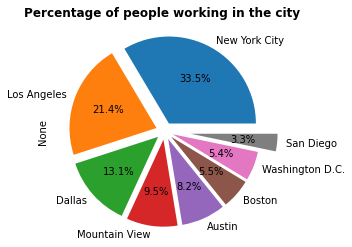

In [38]:
def func(pct):
  return "{:1.1f}%".format(pct)
df.value_counts('City').plot(kind = 'pie', fig=(20,20)
    ,autopct=lambda pct: func(pct),explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3])
plt.title('Percentage of people working in the city ',fontweight = 'bold')


Text(0.5, 1.0, 'No. of Healthy male according to city')

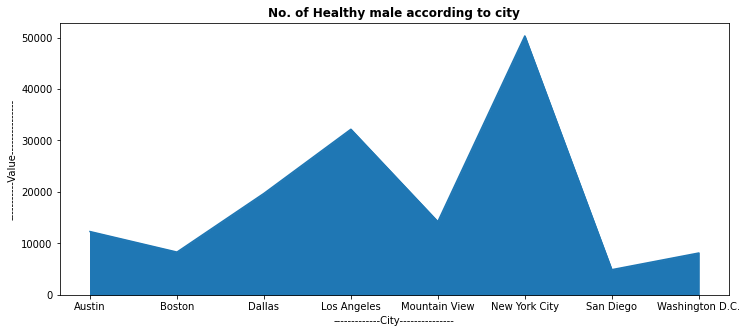

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("C:\\Users\\19195\\Desktop\\DataAnalytics\\toy_dataset.csv")
df[(df.Gender == 'Male') & (df.Illness == 'No')]
df.groupby('City').size().plot(kind = 'line', figsize= (12,5))
plt.xlabel('-------------City---------------')
plt.ylabel('-----------Value---------------')
plt.title('No. of Healthy male according to city',fontweight = 'bold')



In [17]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# df = pd.read_csv("C:\\Users\\19195\\Desktop\\DataAnalytics\\toy_dataset.csv") 
years = list(map(str,range(1999,2022)))
pd.DataFrame(years)


,0
0,1999
1,2000
2,2001
3,2002
4,2003
5,2004
6,2005
7,2006
8,2007
9,2008
